## Importing the relevant libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, gc, joblib, re
warnings.filterwarnings('ignore')
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay
from scipy.stats import probplot
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, chi2, RFE, SequentialFeatureSelector
from xgboost import XGBClassifier, XGBRFClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Loading the dataset

In [109]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Data Exploration

In [110]:
df.shape

(6819, 96)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [112]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [113]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [114]:
df.duplicated().sum()

0

In [115]:
# Removing the columns with zero variance
df.drop(df.columns[df.nunique() == 1][0],axis=1,inplace=True)

In [116]:
df.columns = df.columns.str.replace(' ','')

In [117]:
df.rename({'Liability-AssetsFlag': 'LiabilityAssetsFlag'},axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

In [118]:
# for col in df.drop('Bankrupt?',axis=1).columns:
#     print(f"Skewness of {col}:",df[col].skew())
#     print(f"Kurtosis of {col}:",df[col].kurtosis())
#     plt.figure(figsize=(14,4))
#     plt.subplot(131)
#     sns.distplot(df[col])
#     plt.subplot(132)
#     sns.boxplot(df[col])
#     plt.subplot(133)
#     probplot(df[col],rvalue=True,plot=plt,dist='norm')
#     plt.suptitle(col)
#     plt.show()
#     gc.collect()

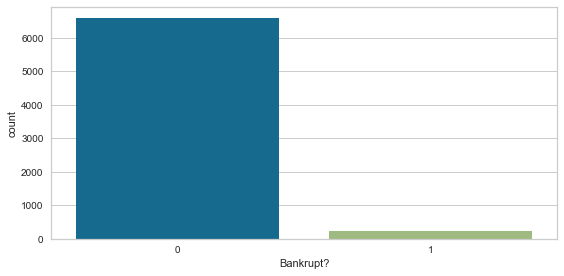

In [119]:
plt.figure(figsize=(8,4))
fig = sns.countplot(df['Bankrupt?'])
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

The target class "Bankrupt?" is highly imbalanced with only a marginal number of companies getting bankrupted. The imbalanced classes need to be balanced out later as they may affect the performance of machine learning algorithms.

## Feature Engineering

### Feature Splitting

In [120]:
X = df.drop('Bankrupt?',axis=1)
y = df['Bankrupt?']

### Data Preprocessing

In [121]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

X = pipeline.fit_transform(X)
X.shape

(6819, 69)

### Outlier Removal

In [122]:
def remove_outliers(data,col):
    winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5)
    data[col] = winsorizer.fit_transform(data[[col]])
    return data[col]

In [123]:
for col in X.drop('LiabilityAssetsFlag',axis=1).columns:
    X[col] = remove_outliers(X,col)

### Balancing out imbalanced target labels

In [124]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd
from sklearn.datasets import make_classification
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)

In [125]:
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 6599, 0: 6599})


In [126]:
X.shape

(13198, 69)

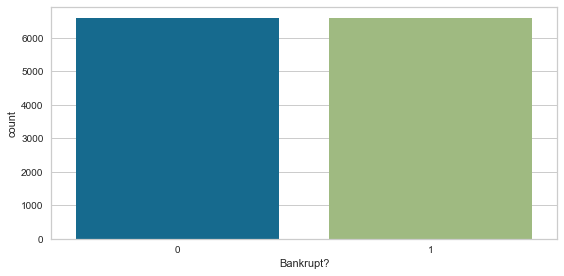

In [127]:
plt.figure(figsize=(8,4))
fig = sns.countplot(y)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

Now, the target classes are perfectly balanced. 

### Performing train-test-split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=58)

### Feature Selection

In [129]:
kbest = SelectKBest(k=10,score_func=chi2)
kbest.fit(X_train,y_train)

SelectKBest(score_func=<function chi2 at 0x7ff530fab280>)

In [130]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['OperatingExpenseRate', 'Researchanddevelopmentexpenserate',
       'Taxrate(A)', 'TotalAssetGrowthRate', 'Debtratio%',
       'InventoryTurnoverRate(times)', 'QuickAssets/TotalAssets',
       'Cash/TotalAssets', 'QuickAssetTurnoverRate', 'CashTurnoverRate'],
      dtype=object)

In [131]:
perc = SelectPercentile(percentile=25,score_func=chi2)
perc.fit(X_train,y_train)

SelectPercentile(percentile=25, score_func=<function chi2 at 0x7ff530fab280>)

In [132]:
selected_features = perc.get_feature_names_out()
selected_features

array(['ROA(C)beforeinterestanddepreciationbeforeinterest',
       'OperatingExpenseRate', 'Researchanddevelopmentexpenserate',
       'Taxrate(A)', 'TotalAssetGrowthRate', 'QuickRatio',
       'Totaldebt/Totalnetworth', 'Debtratio%', 'TotalAssetTurnover',
       'InventoryTurnoverRate(times)', 'QuickAssets/TotalAssets',
       'Cash/TotalAssets', 'QuickAssetTurnoverRate', 'CashTurnoverRate',
       'FixedAssetstoAssets', 'CurrentLiabilitytoCurrentAssets',
       'EquitytoLiability'], dtype=object)

In [133]:
rf = SelectFromModel(estimator=RandomForestClassifier(),max_features=10)
rf.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10)

In [134]:
selected_features = rf.get_feature_names_out()
selected_features

array(['ROA(C)beforeinterestanddepreciationbeforeinterest',
       'Non-industryincomeandexpenditure/revenue',
       'PersistentEPSintheLastFourSeasons', 'NetValueGrowthRate',
       'Totaldebt/Totalnetworth', 'Debtratio%', 'Borrowingdependency',
       'RetainedEarningstoTotalAssets', 'Totalincome/Totalexpense',
       'EquitytoLiability'], dtype=object)

In [135]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=10,step=4,verbose=2)
rfe.fit(X_train,y_train)

Fitting estimator with 69 features.
Fitting estimator with 65 features.
Fitting estimator with 61 features.
Fitting estimator with 57 features.
Fitting estimator with 53 features.
Fitting estimator with 49 features.
Fitting estimator with 45 features.
Fitting estimator with 41 features.
Fitting estimator with 37 features.
Fitting estimator with 33 features.
Fitting estimator with 29 features.
Fitting estimator with 25 features.
Fitting estimator with 21 features.
Fitting estimator with 17 features.
Fitting estimator with 13 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=4,
    verbose=2)

In [136]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['ROA(C)beforeinterestanddepreciationbeforeinterest',
       'PersistentEPSintheLastFourSeasons', 'NetValueGrowthRate',
       'Totaldebt/Totalnetworth', 'Debtratio%', 'Borrowingdependency',
       'Allocationrateperperson', 'RetainedEarningstoTotalAssets',
       'Totalincome/Totalexpense', 'CashTurnoverRate'], dtype=object)

In [137]:
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),n_features_to_select=10,direction='forward')
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          n_features_to_select=10)

In [138]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['PersistentEPSintheLastFourSeasons', 'RevenuePerShare(Yuan¥)',
       'ContinuousNetProfitGrowthRate', 'TotalAssetGrowthRate',
       'Borrowingdependency', 'Revenueperperson',
       'QuickAssetTurnoverRate', 'CashTurnoverRate',
       'TotalassetstoGNPprice', 'DegreeofFinancialLeverage(DFL)'],
      dtype=object)

In [139]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
def plot_feature_importances(feat_imp_type):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())
    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'},axis=1,inplace=True)
    plt.figure(figsize=(12,8))
    fig = sns.barplot(x='Importance',y='Feature',data=feat_imps_df[:10],orient='horizontal',palette='viridis')
    plt.title(f"{feat_imp_type.title()} Feature Importance")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect();

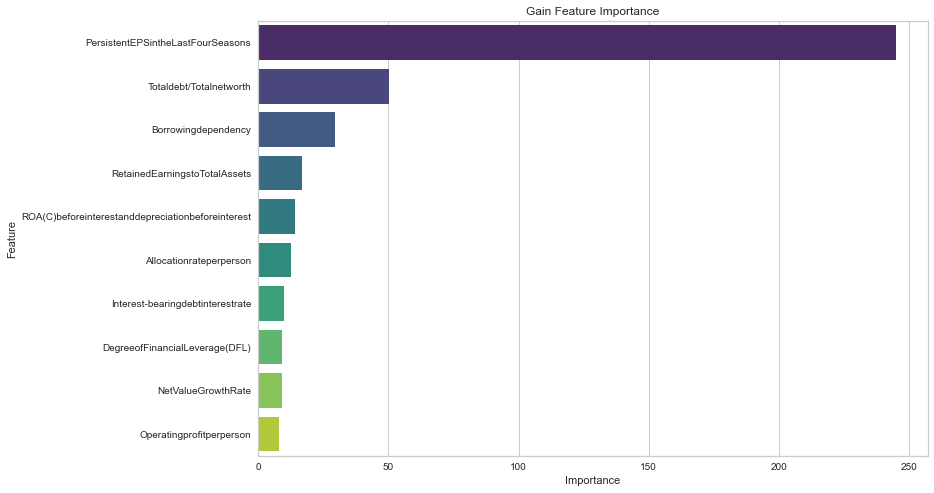

In [141]:
plot_feature_importances('gain')

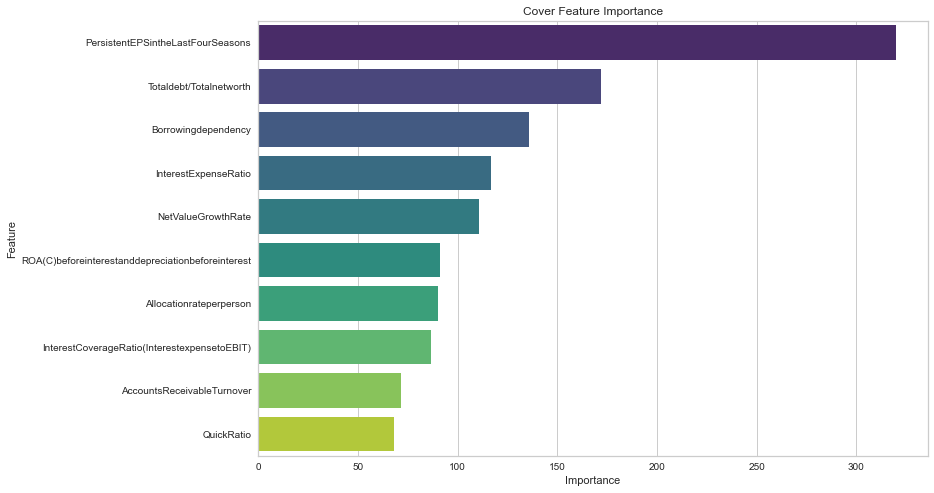

In [142]:
plot_feature_importances('cover')

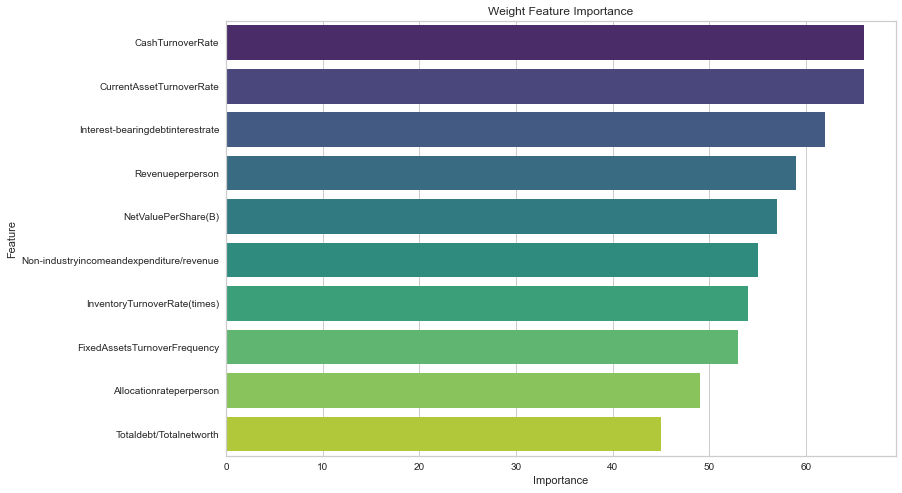

In [143]:
plot_feature_importances('weight')

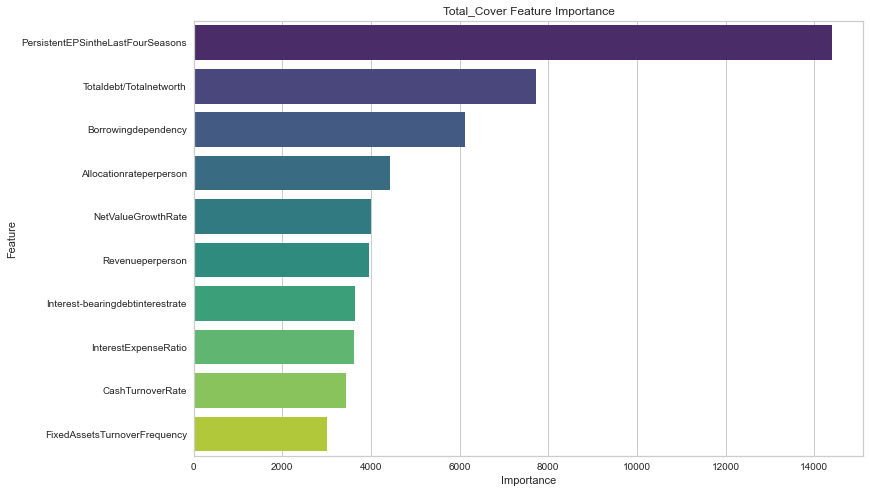

In [144]:
plot_feature_importances('total_cover')

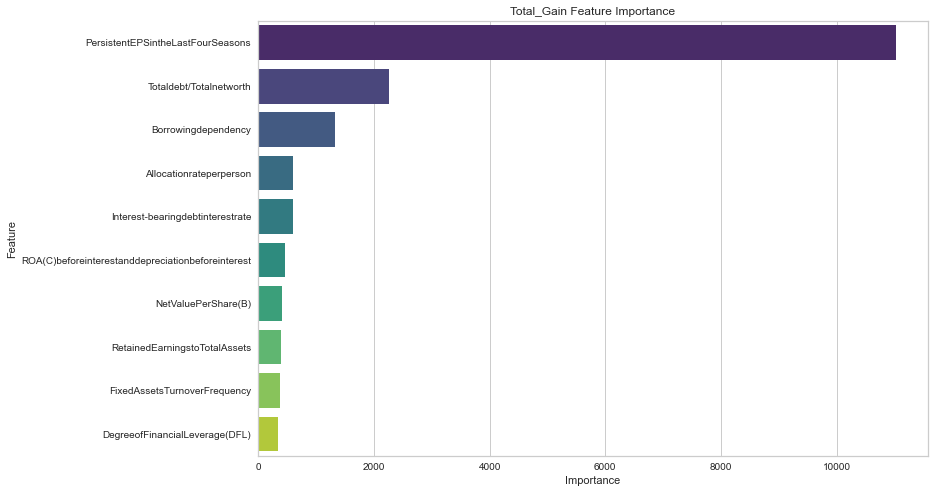

In [145]:
plot_feature_importances('total_gain')

In [146]:
final_selected_features = ['WorkingCapital/Equity',
                           'PersistentEPSintheLastFourSeasons',
                           'Borrowingdependency',
                           'NetValueGrowthRate',
                           'Interest-bearingdebtinterestrate',
                           'ROA(C)beforeinterestanddepreciationbeforeinterest',
                           'Cash/TotalAssets',
                           'Non-industryincomeandexpenditure/revenue',
                           'NetValuePerShare(B)',
                           'Totaldebt/Totalnetworth']

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [147]:
renamed_cols = {'Borrowingdependency': 'BorrowingDependency',
                'Interest-bearingdebtinterestrate': 'InterestBearingDebtInterestRate',
                'ROA(C)beforeinterestanddepreciationbeforeinterest': 'ROA(C)BeforeInterestAndDepreciationBeforeInterest',
                'Non-industryincomeandexpenditure/revenue': 'NonIndustryIncomeAndExpenditure/Revenue',
                'Totaldebt/Totalnetworth': 'TotalDebt/TotalNetWorth'}

final_X_train.rename(renamed_cols,axis=1,inplace=True)
final_X_test.rename(renamed_cols,axis=1,inplace=True)

In [148]:
gc.collect()

257

### Feature Scaling

In [149]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)
final_X_train.head()

,WorkingCapital/Equity,PersistentEPSintheLastFourSeasons,BorrowingDependency,NetValueGrowthRate,InterestBearingDebtInterestRate,ROA(C)BeforeInterestAndDepreciationBeforeInterest,Cash/TotalAssets,NonIndustryIncomeAndExpenditure/Revenue,NetValuePerShare(B),TotalDebt/TotalNetWorth
0,-0.556468,0.306849,-0.547988,0.162360,0.341315,0.193982,-0.846757,2.300795,0.355933,-0.944589
1,-0.603454,-1.274537,-0.452764,-1.217768,-0.596424,-1.375407,-0.587377,-1.189621,-0.901705,-0.479779
2,1.096121,0.574365,-0.209673,-0.159223,-0.287983,0.448423,-0.294984,0.460127,0.315702,-0.655596
3,-0.317385,0.208498,-0.829076,0.134693,-0.037060,0.049827,0.431560,0.675602,1.429938,-1.233118
4,0.290351,-0.413082,-1.335966,-0.516894,-0.363658,-1.111226,0.287977,0.922120,-0.515165,-1.732217


In [150]:
final_X_test.head()

,WorkingCapital/Equity,PersistentEPSintheLastFourSeasons,BorrowingDependency,NetValueGrowthRate,InterestBearingDebtInterestRate,ROA(C)BeforeInterestAndDepreciationBeforeInterest,Cash/TotalAssets,NonIndustryIncomeAndExpenditure/Revenue,NetValuePerShare(B),TotalDebt/TotalNetWorth
0,0.685064,1.490999,-1.227527,0.489557,-0.973042,1.394112,0.548272,0.222739,1.424691,-1.403396
1,-1.865100,-1.202598,1.402558,-1.188030,1.192369,-1.260910,-0.810300,-1.010768,-1.113432,1.381439
2,0.737665,0.302915,-0.494835,0.210478,0.416991,0.523974,-0.099819,0.496648,0.532602,-0.913405
3,0.399102,-1.373824,-0.085007,-1.366126,0.014589,-1.489035,-0.770278,-1.257360,-0.985431,0.291773
4,-1.544072,-1.113073,1.107321,-1.119185,0.482564,-1.174597,-0.604261,-0.875650,-0.787614,1.103447


## Model Training & Evaluation

In [151]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [152]:

def train_and_evaluate_model(model):
    model.fit(final_X_train,y_train)
    y_pred = model.predict(final_X_test)
    print("Classification Report:")
    print(classification_report(y_test,y_pred))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    PrecisionRecallDisplay.from_predictions(y_test,y_pred)
    RocCurveDisplay.from_predictions(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    roc_auc = roc_auc_score(y_test,y_pred,average='macro')
    
    if re.search('catboost',str(model)) == None:
        visualizer = ClassPredictionError(model)
        visualizer.score(final_X_test,y_test)
        visualizer.show()
        del visualizer
        
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model)
    del acc, precision, recall, f1, roc_auc
    gc.collect()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1999
           1       0.89      0.90      0.90      1961

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

--------------------------------------------------


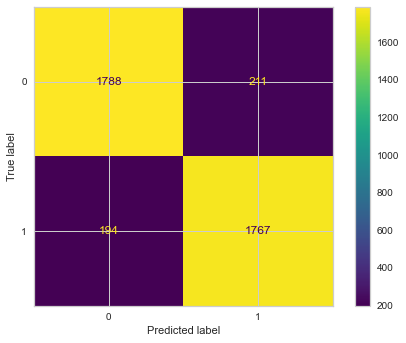

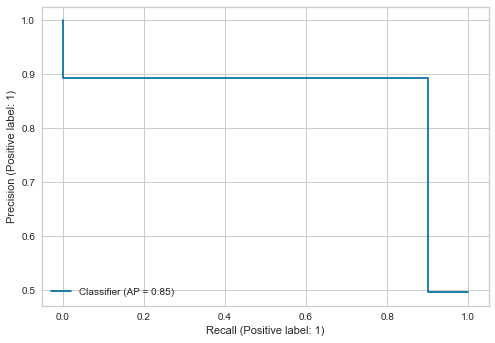

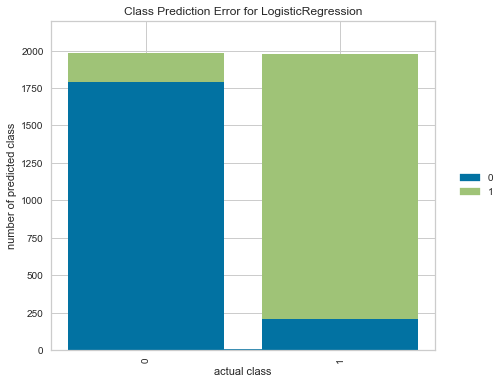

In [153]:
from yellowbrick.classifier import ClassPredictionError
train_and_evaluate_model(LogisticRegression())

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1999
           1       0.70      0.69      0.69      1961

    accuracy                           0.70      3960
   macro avg       0.70      0.70      0.70      3960
weighted avg       0.70      0.70      0.70      3960

--------------------------------------------------


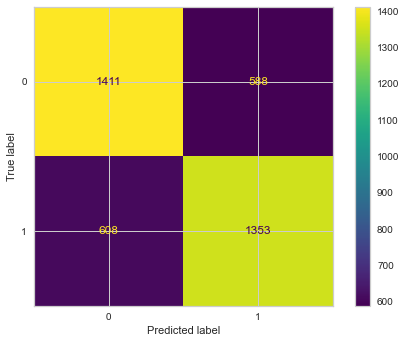

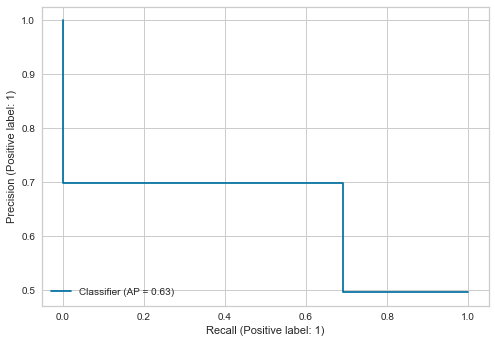

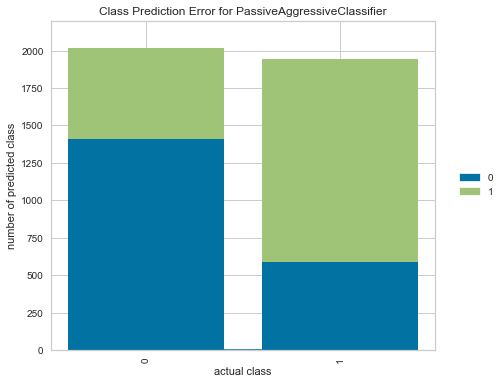

In [154]:
train_and_evaluate_model(PassiveAggressiveClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1999
           1       0.88      0.92      0.90      1961

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

--------------------------------------------------


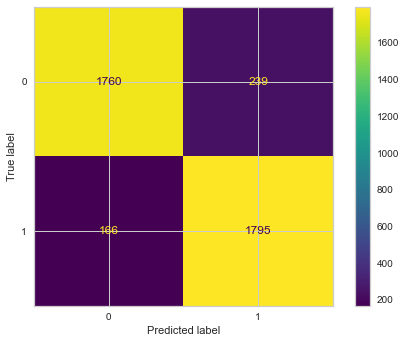

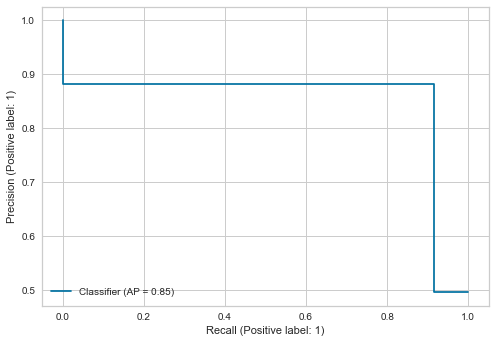

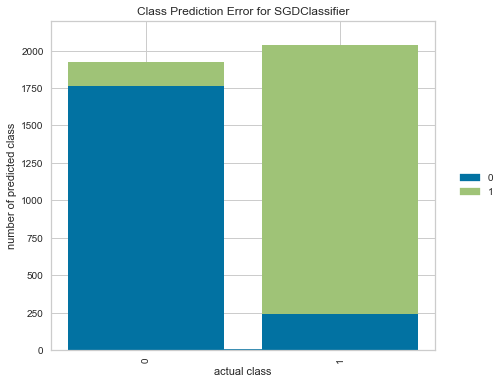

In [155]:
train_and_evaluate_model(SGDClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1999
           1       0.87      0.91      0.89      1961

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

--------------------------------------------------


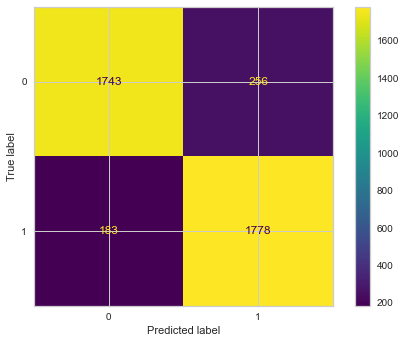

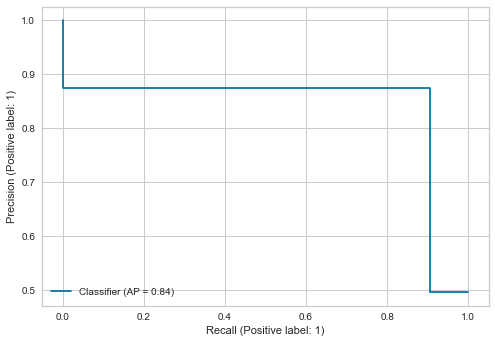

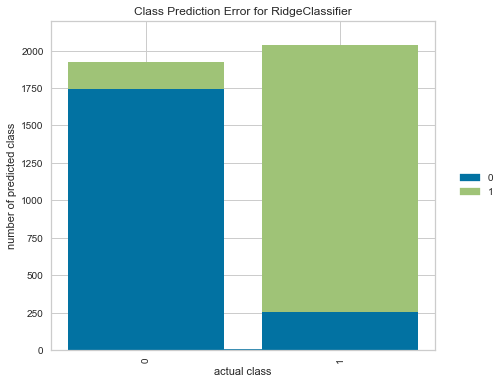

In [156]:
train_and_evaluate_model(RidgeClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1999
           1       0.92      0.99      0.96      1961

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

--------------------------------------------------


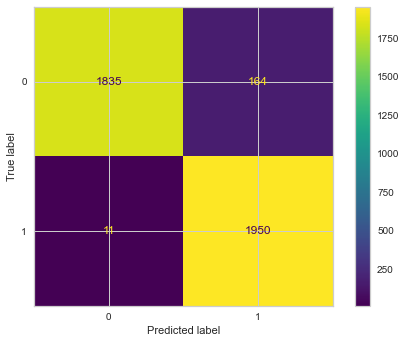

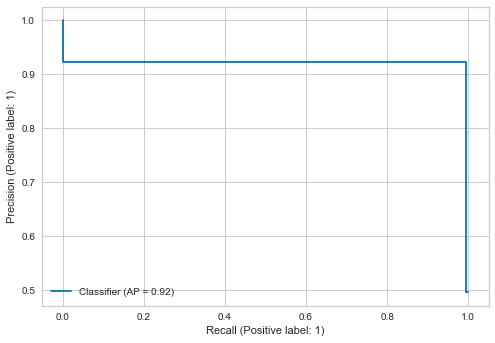

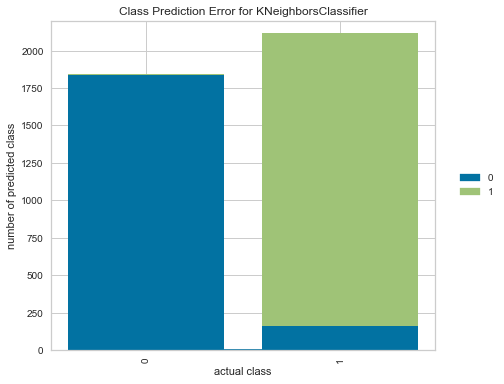

In [157]:
train_and_evaluate_model(KNeighborsClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1999
           1       0.88      0.89      0.88      1961

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

--------------------------------------------------


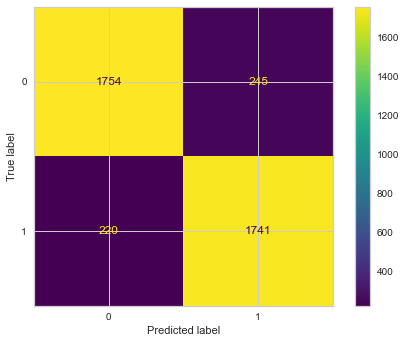

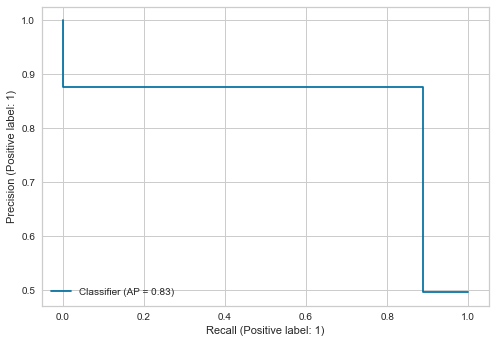

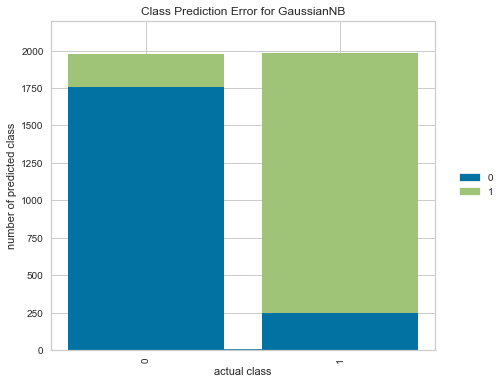

In [158]:
train_and_evaluate_model(GaussianNB())

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1999
           1       0.87      0.87      0.87      1961

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960

--------------------------------------------------


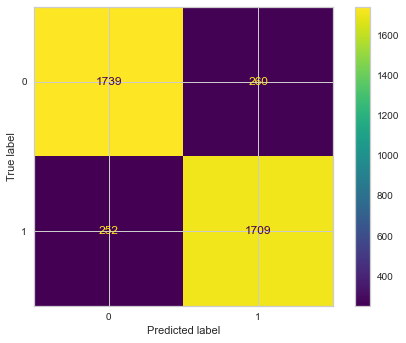

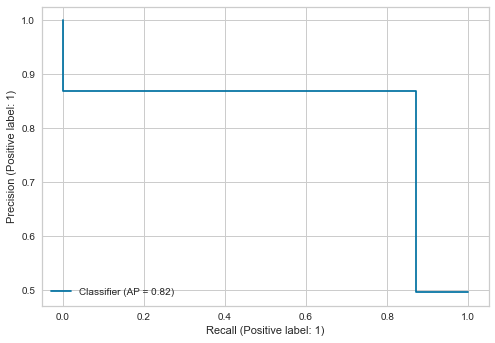

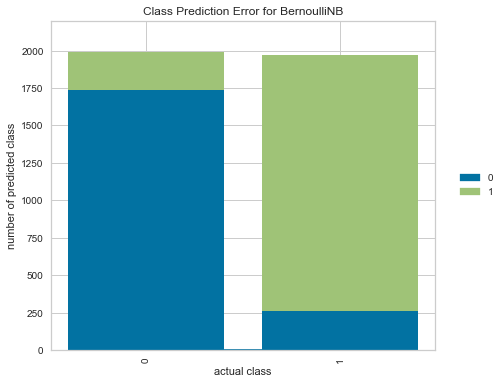

In [159]:
train_and_evaluate_model(BernoulliNB())

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1999
           1       0.92      0.96      0.94      1961

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960

--------------------------------------------------


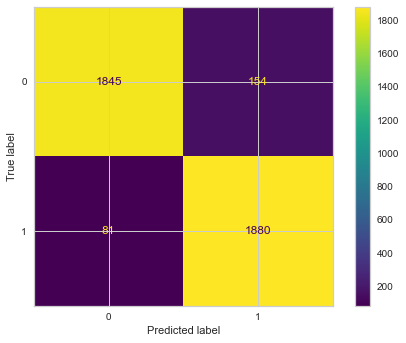

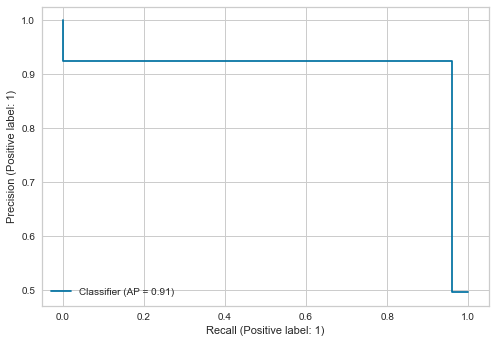

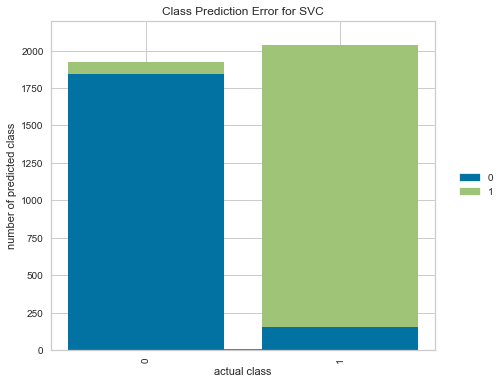

In [160]:
train_and_evaluate_model(SVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1999
           1       0.89      0.88      0.88      1961

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

--------------------------------------------------


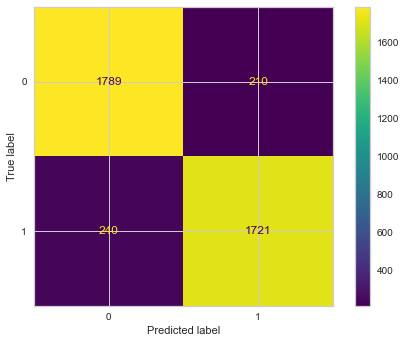

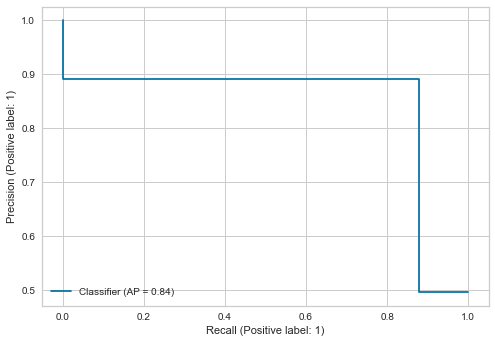

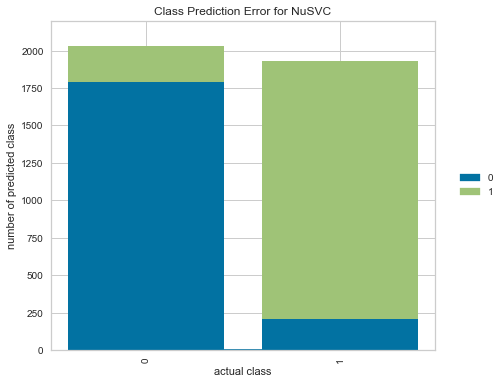

In [161]:
train_and_evaluate_model(NuSVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1999
           1       0.89      0.90      0.90      1961

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

--------------------------------------------------


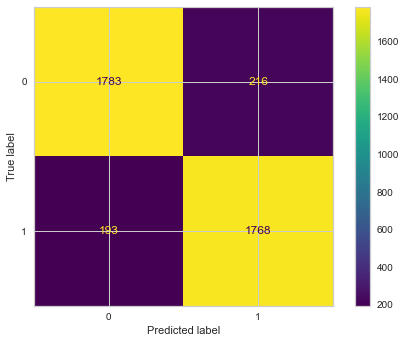

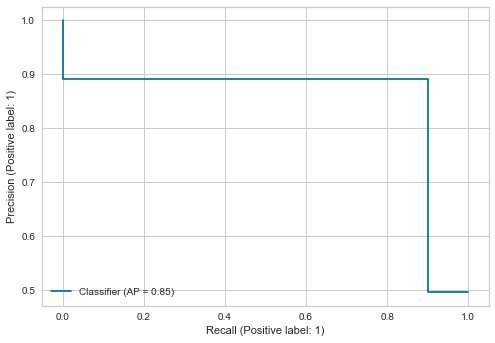

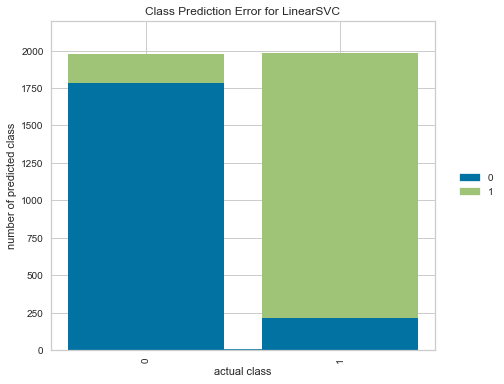

In [162]:
train_and_evaluate_model(LinearSVC())

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1999
           1       0.93      0.95      0.94      1961

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960

--------------------------------------------------


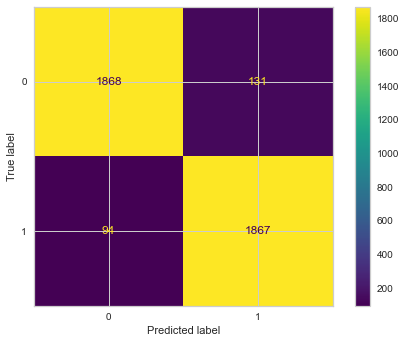

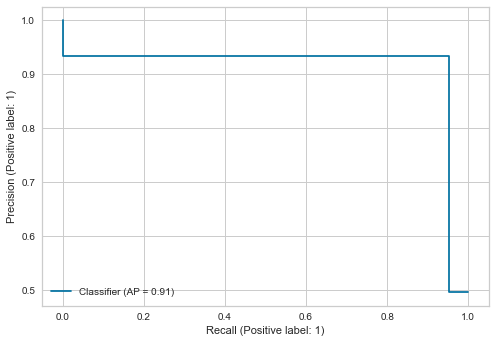

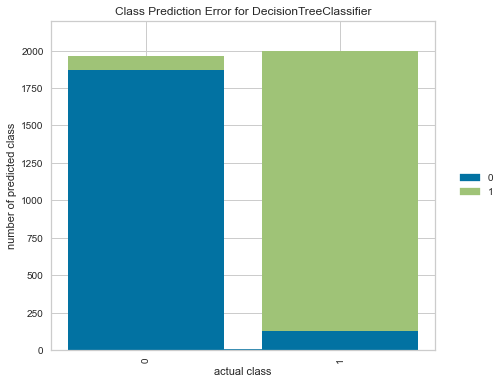

In [163]:
train_and_evaluate_model(DecisionTreeClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1999
           1       0.96      0.98      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

--------------------------------------------------


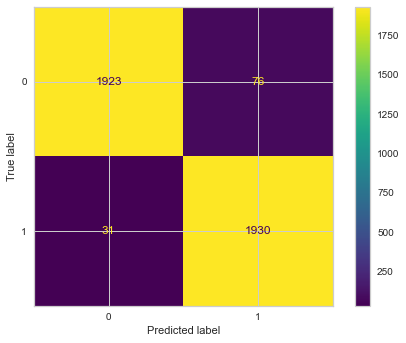

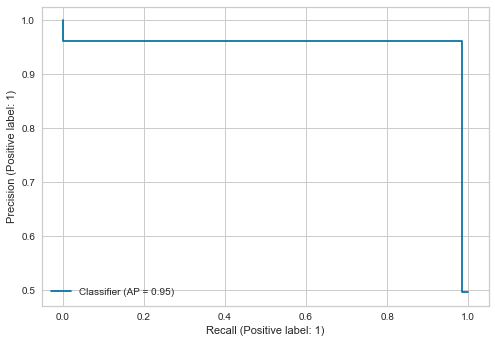

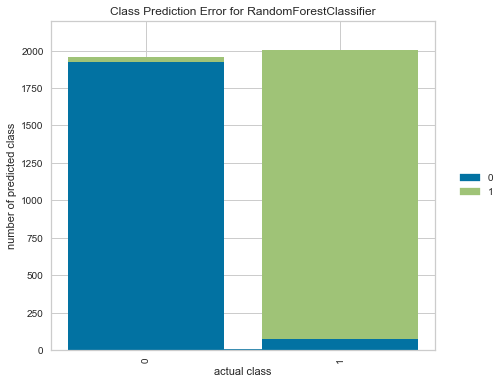

In [164]:
train_and_evaluate_model(RandomForestClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1999
           1       0.95      0.99      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

--------------------------------------------------


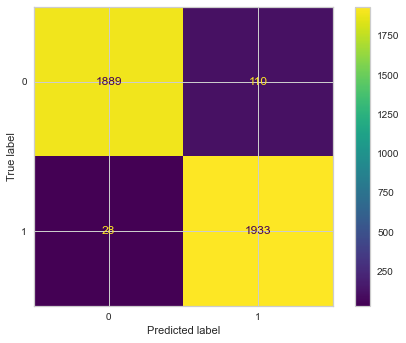

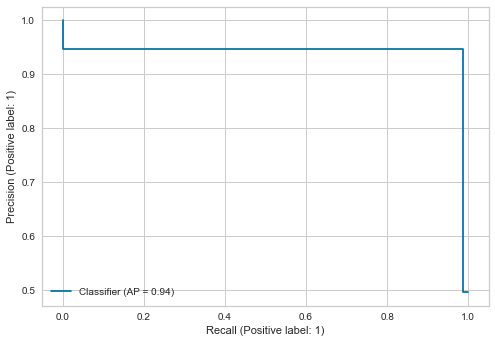

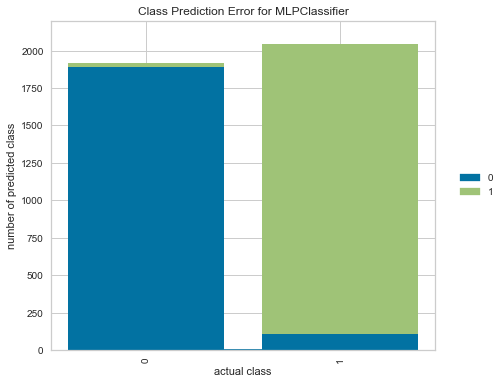

In [165]:
train_and_evaluate_model(MLPClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1999
           1       0.96      0.99      0.98      1961

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960

--------------------------------------------------


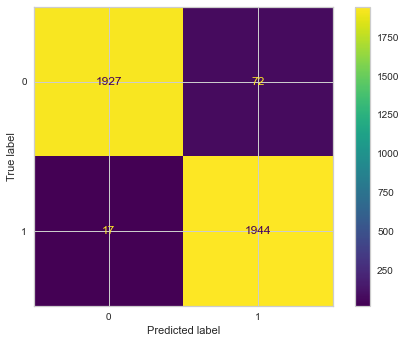

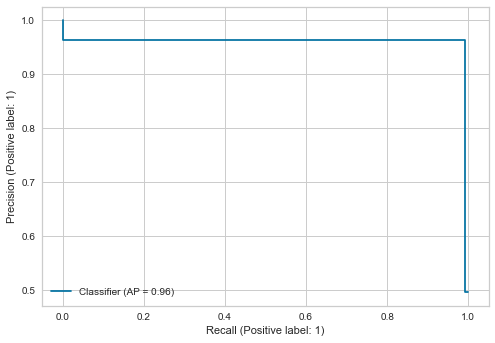

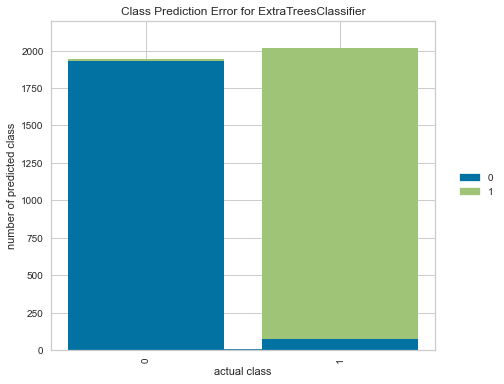

In [166]:
train_and_evaluate_model(ExtraTreesClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1999
           1       0.92      0.92      0.92      1961

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960

--------------------------------------------------


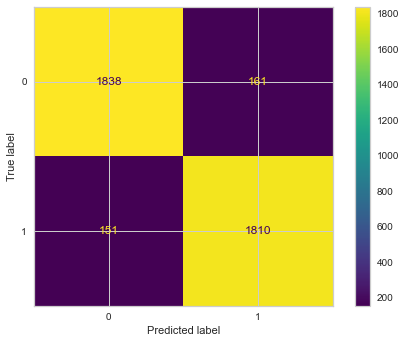

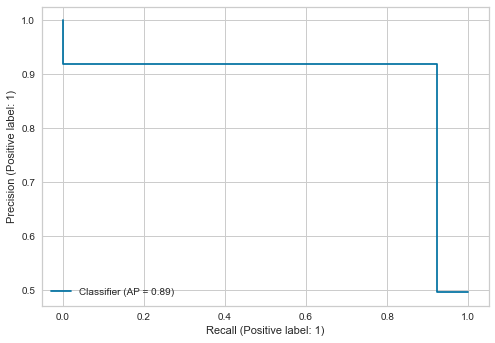

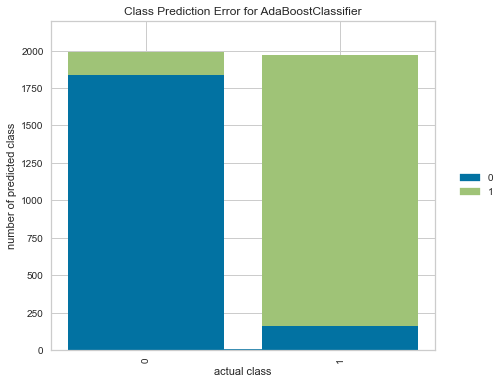

In [167]:
train_and_evaluate_model(AdaBoostClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1999
           1       0.93      0.95      0.94      1961

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960

--------------------------------------------------


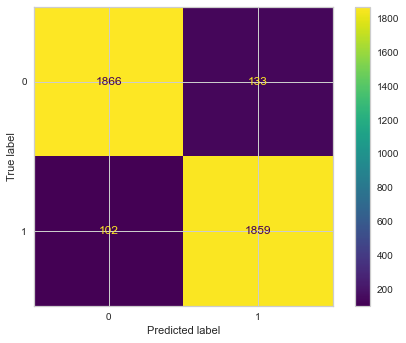

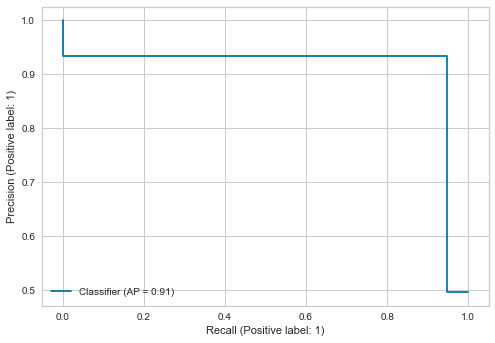

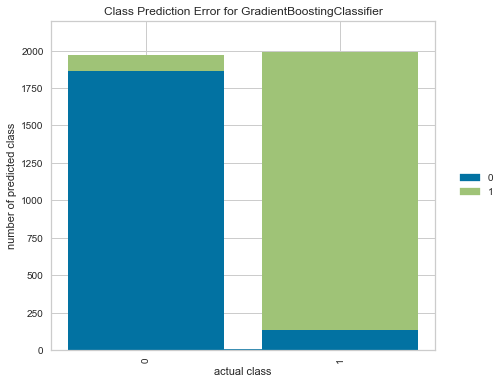

In [168]:
train_and_evaluate_model(GradientBoostingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1999
           1       0.96      0.97      0.96      1961

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

--------------------------------------------------


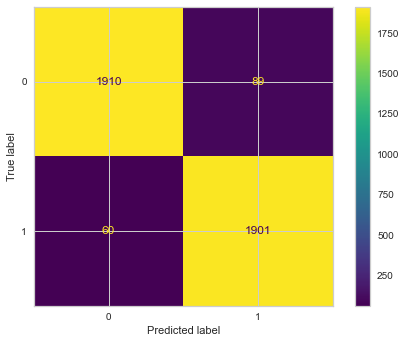

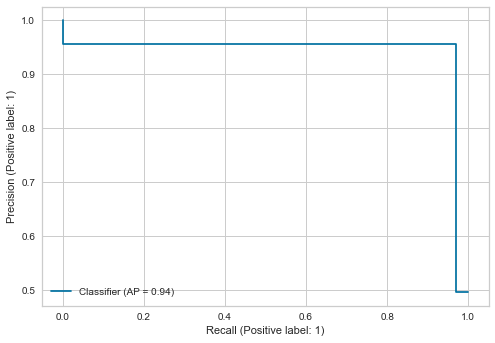

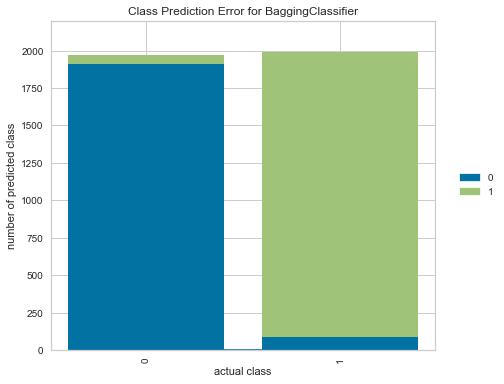

In [169]:
train_and_evaluate_model(BaggingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1999
           1       0.96      0.98      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

--------------------------------------------------


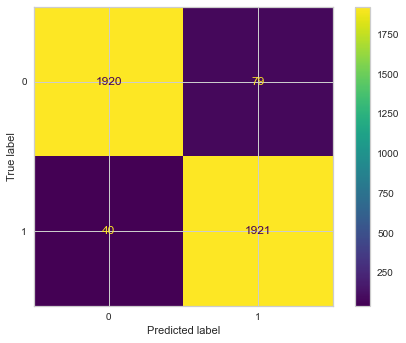

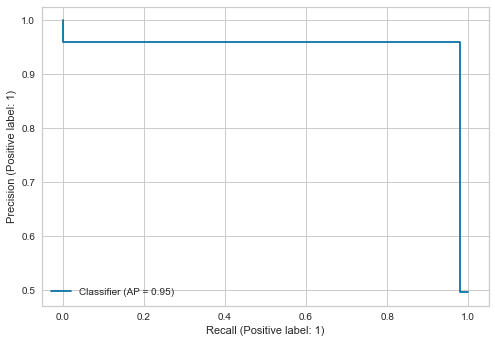

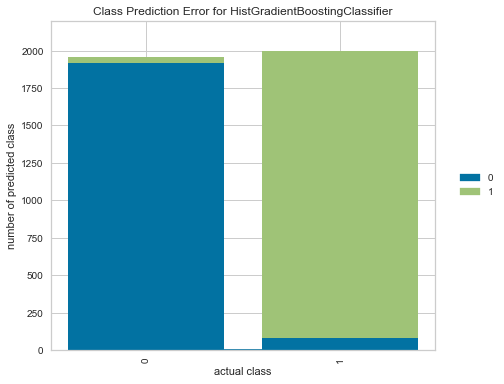

In [170]:
train_and_evaluate_model(HistGradientBoostingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1999
           1       0.96      0.98      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

--------------------------------------------------


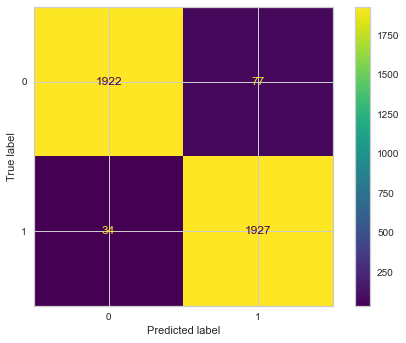

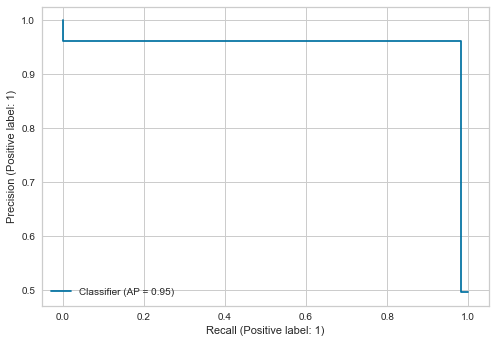

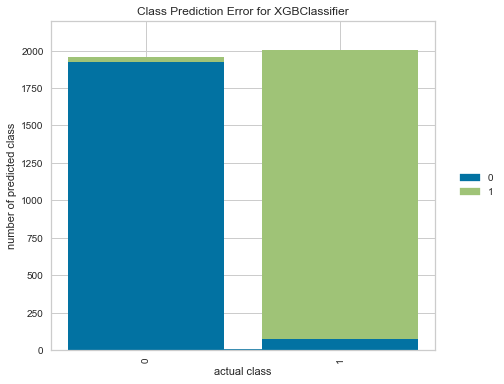

In [171]:
train_and_evaluate_model(XGBClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1999
           1       0.93      0.97      0.95      1961

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960

--------------------------------------------------


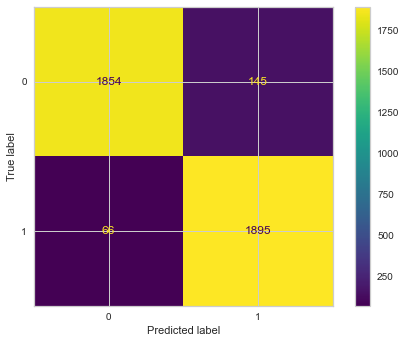

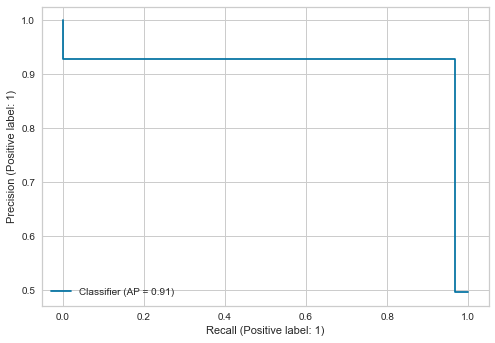

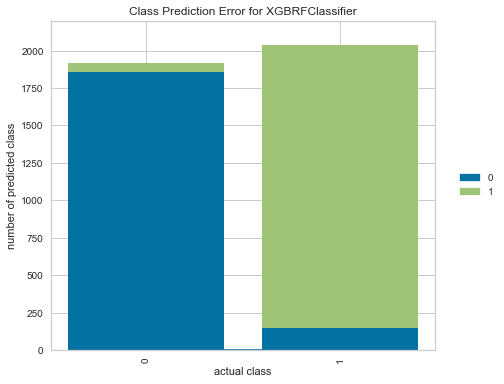

In [172]:
train_and_evaluate_model(XGBRFClassifier())

## Baseline Models Performance Comparison

In [173]:
model_perfs = pd.DataFrame({'Model': models, 
                            'Accuracy': accuracy_scores, 
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores,
                            'ROC-AUC': roc_auc_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,"(ExtraTreeClassifier(random_state=1407525157),...",0.977525,0.977770,0.977656,0.977525,0.977656
1,"(DecisionTreeClassifier(max_features='auto', r...",0.972980,0.973124,0.973086,0.972980,0.973086
2,"XGBClassifier(base_score=None, booster=None, c...",0.971970,0.972097,0.972071,0.971970,0.972071
3,HistGradientBoostingClassifier(),0.969949,0.970046,0.970041,0.969949,0.970041
4,MLPClassifier(),0.965152,0.965776,0.965347,0.965147,0.965347
5,(DecisionTreeClassifier(random_state=921597523...,0.962374,0.962410,0.962441,0.962374,0.962441
6,KNeighborsClassifier(),0.955808,0.958232,0.956175,0.955771,0.956175
7,"XGBRFClassifier(base_score=None, booster=None,...",0.946717,0.947273,0.946904,0.946711,0.946904
8,DecisionTreeClassifier(),0.943182,0.943262,0.943266,0.943182,0.943266
9,SVC(),0.940657,0.941116,0.940828,0.940652,0.940828


Among all the baseline models, the ExtraTree Classifier is the best performing model which outperforms all other models by achieving a remarkable accuracy of almost 98% on the test set.

In [174]:
best_model = model_perfs.iloc[0]['Model']
best_model

ExtraTreesClassifier()

In [175]:
avg_cv_scores = cross_val_score(best_model,final_X_test,y_test,scoring='accuracy',cv=5,verbose=2)
mean_score = round(np.mean(avg_cv_scores),4)
print(f"Mean Cross Validation Performance of Stacking Classifier: {mean_score*100}%")

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
Mean Cross Validation Performance of Stacking Classifier: 96.41%


## Saving the best performing model for deployment into production

In [176]:
pipeline = Pipeline(steps=[
    ('scaler',scaler),
    ('model',model_perfs.iloc[0]['Model'])
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesClassifier())])

In [177]:
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [178]:
joblib.load('pipeline.pkl')

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesClassifier())])

In [179]:
gc.collect()

25

In [180]:
df.rename(renamed_cols,axis=1,inplace=True)

In [181]:
for col in final_X_train.columns:
    print(f"Minimum value of {col}:",df[col].min())
    print(f"Maximum value of {col}:",df[col].max())

Minimum value of WorkingCapital/Equity: 0.0
Maximum value of WorkingCapital/Equity: 1.0
Minimum value of PersistentEPSintheLastFourSeasons: 0.0
Maximum value of PersistentEPSintheLastFourSeasons: 1.0
Minimum value of BorrowingDependency: 0.0
Maximum value of BorrowingDependency: 1.0
Minimum value of NetValueGrowthRate: 0.0
Maximum value of NetValueGrowthRate: 9330000000.0
Minimum value of InterestBearingDebtInterestRate: 0.0
Maximum value of InterestBearingDebtInterestRate: 990000000.0
Minimum value of ROA(C)BeforeInterestAndDepreciationBeforeInterest: 0.0
Maximum value of ROA(C)BeforeInterestAndDepreciationBeforeInterest: 1.0
Minimum value of Cash/TotalAssets: 0.0
Maximum value of Cash/TotalAssets: 1.0
Minimum value of NonIndustryIncomeAndExpenditure/Revenue: 0.0
Maximum value of NonIndustryIncomeAndExpenditure/Revenue: 1.0
Minimum value of NetValuePerShare(B): 0.0
Maximum value of NetValuePerShare(B): 1.0
Minimum value of TotalDebt/TotalNetWorth: 0.0
Maximum value of TotalDebt/TotalN

In [182]:
list(final_X_train.columns)

['WorkingCapital/Equity',
 'PersistentEPSintheLastFourSeasons',
 'BorrowingDependency',
 'NetValueGrowthRate',
 'InterestBearingDebtInterestRate',
 'ROA(C)BeforeInterestAndDepreciationBeforeInterest',
 'Cash/TotalAssets',
 'NonIndustryIncomeAndExpenditure/Revenue',
 'NetValuePerShare(B)',
 'TotalDebt/TotalNetWorth']

In [183]:
del pipeline
gc.collect()

0